# Setup

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file and specific sheet
excel_file = 'CAT_26042024_SectorAssessmentData_DataExplorer.xlsx'
sheet_name = 'Data'
df = pd.read_excel(excel_file, sheet_name=sheet_name, engine='openpyxl')

# Add my own column names
df.columns = ['Type', 'Description', 'ISO_A3', 'Year', 'Timeline', 'Value', 'Unit']
# Save the DataFrame to a CSV file
df.to_csv('output3.csv', index=False)

C:\Users\Kaden\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## Data Exploration

In [3]:
df.head()

,Type,Description,ISO_A3,Year,Timeline,Value,Unit
0,Buildings,"Buildings emissions intensity (per floor area,...",AUS,2010,historic,141.684671,kg CO2 / m2
1,Buildings,"Buildings emissions intensity (per floor area,...",CAN,2005,historic,115.712823,kg CO2 / m2
2,Buildings,"Buildings emissions intensity (per floor area,...",CAN,2010,historic,90.627137,kg CO2 / m2
3,Buildings,"Buildings emissions intensity (per floor area,...",CHL,2005,historic,96.483424,kg CO2 / m2
4,Buildings,"Buildings emissions intensity (per floor area,...",CHL,2010,historic,147.859903,kg CO2 / m2


In [4]:
df['ISO_A3'].unique()

array(['AUS', 'CAN', 'CHL', 'IDN', 'JPN', 'MEX', 'NZL', 'NOR', 'RUS',
       'DEU', 'FRA', 'ITA', 'GBR', 'BRA', 'CHN', 'EU27', 'IND', 'USA',
       'World', 'ZAF', 'ARG', 'CRI', 'ETH', 'KAZ', 'NPL', 'PER', 'PHL',
       'SAU', 'KOR', 'CHE', 'UKR', 'TUR', 'Latin America-31',
       'Non-EU Europe', 'Asia-Pacific-40', 'Middle East', 'Africa', 'ARE',
       'BTN', 'GMB', 'MAR', 'SGP'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5420 non-null   object 
 1   Description  5420 non-null   object 
 2   ISO_A3       5420 non-null   object 
 3   Year         5420 non-null   int64  
 4   Timeline     5420 non-null   object 
 5   Value        5420 non-null   float64
 6   Unit         5420 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 296.5+ KB


### Identify What Types there are

In [10]:
df['Type'].unique()

array(['Buildings', 'Electricity', 'Industry', 'Transport',
       'Transport Road'], dtype=object)

### Identify timelines

In [12]:
df['Timeline'].unique()

array(['historic', 'benchmark_min', 'benchmark_max',
       'benchmark_aspirational_min', 'benchmark_aspirational_max',
       'projected_current_policy_min'], dtype=object)

## Get Valid iso_a3 values
### Remove regional or group level entities, like EU

In [15]:
import pycountry

country_column = df['ISO_A3']

# Get a list of valid ISO Alpha-3 country codes
valid_iso_a3 = {country.alpha_3 for country in pycountry.countries}
print(valid_iso_a3)

{'BVT', 'COK', 'PRT', 'AIA', 'ATA', 'MNE', 'GEO', 'GIB', 'TKM', 'ALA', 'FRA', 'KNA', 'MDV', 'GRD', 'WSM', 'ECU', 'NPL', 'COL', 'MLI', 'ATF', 'AGO', 'BLM', 'GAB', 'ARG', 'SDN', 'IRL', 'ZAF', 'VGB', 'CZE', 'FLK', 'BOL', 'IND', 'PSE', 'ATG', 'BTN', 'MAR', 'NIU', 'CIV', 'ESP', 'TJK', 'CHE', 'BHS', 'SXM', 'URY', 'SUR', 'TUN', 'VCT', 'MDA', 'PRI', 'HRV', 'UMI', 'ASM', 'CPV', 'VEN', 'ZMB', 'MLT', 'BMU', 'LBR', 'MHL', 'QAT', 'SVN', 'ROU', 'MUS', 'BLR', 'ITA', 'GRL', 'CAN', 'PAK', 'CYP', 'AUS', 'RUS', 'NAM', 'GNB', 'ERI', 'IRQ', 'BLZ', 'CYM', 'ARM', 'CUW', 'ISL', 'LCA', 'NOR', 'SGS', 'SLB', 'ALB', 'IDN', 'AFG', 'KAZ', 'KGZ', 'MAC', 'REU', 'EST', 'MDG', 'TKL', 'SJM', 'BGR', 'SYR', 'BES', 'COG', 'PYF', 'GBR', 'PER', 'SLV', 'TON', 'CHN', 'SAU', 'VIR', 'NGA', 'BGD', 'NZL', 'SRB', 'TWN', 'CAF', 'SVK', 'SMR', 'SOM', 'BRA', 'IRN', 'SSD', 'ARE', 'CXR', 'PNG', 'CUB', 'PAN', 'YEM', 'HUN', 'BIH', 'NIC', 'GHA', 'KEN', 'UZB', 'JEY', 'GNQ', 'GMB', 'MOZ', 'DOM', 'ABW', 'UGA', 'VUT', 'DMA', 'GIN', 'GLP', 'THA'

In [17]:
# Filter rows with valid ISO codes
valid_countries = country_column[country_column.isin(valid_iso_a3)]

# Preview valid countries
valid_countries.unique()

array(['AUS', 'CAN', 'CHL', 'IDN', 'JPN', 'MEX', 'NZL', 'NOR', 'RUS',
       'DEU', 'FRA', 'ITA', 'GBR', 'BRA', 'CHN', 'IND', 'USA', 'ZAF',
       'ARG', 'CRI', 'ETH', 'KAZ', 'NPL', 'PER', 'PHL', 'SAU', 'KOR',
       'CHE', 'UKR', 'TUR', 'ARE', 'BTN', 'GMB', 'MAR', 'SGP'],
      dtype=object)

In [19]:
# Compare valid countries to what I removed
country_column.unique()

array(['AUS', 'CAN', 'CHL', 'IDN', 'JPN', 'MEX', 'NZL', 'NOR', 'RUS',
       'DEU', 'FRA', 'ITA', 'GBR', 'BRA', 'CHN', 'EU27', 'IND', 'USA',
       'World', 'ZAF', 'ARG', 'CRI', 'ETH', 'KAZ', 'NPL', 'PER', 'PHL',
       'SAU', 'KOR', 'CHE', 'UKR', 'TUR', 'Latin America-31',
       'Non-EU Europe', 'Asia-Pacific-40', 'Middle East', 'Africa', 'ARE',
       'BTN', 'GMB', 'MAR', 'SGP'], dtype=object)

In [21]:
filtered_df_country = df[df['ISO_A3'].isin(valid_iso_a3)]

In [23]:
filtered_df_country['ISO_A3'].unique()

array(['AUS', 'CAN', 'CHL', 'IDN', 'JPN', 'MEX', 'NZL', 'NOR', 'RUS',
       'DEU', 'FRA', 'ITA', 'GBR', 'BRA', 'CHN', 'IND', 'USA', 'ZAF',
       'ARG', 'CRI', 'ETH', 'KAZ', 'NPL', 'PER', 'PHL', 'SAU', 'KOR',
       'CHE', 'UKR', 'TUR', 'ARE', 'BTN', 'GMB', 'MAR', 'SGP'],
      dtype=object)

### Get World Data

In [25]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")

### Plot World Map

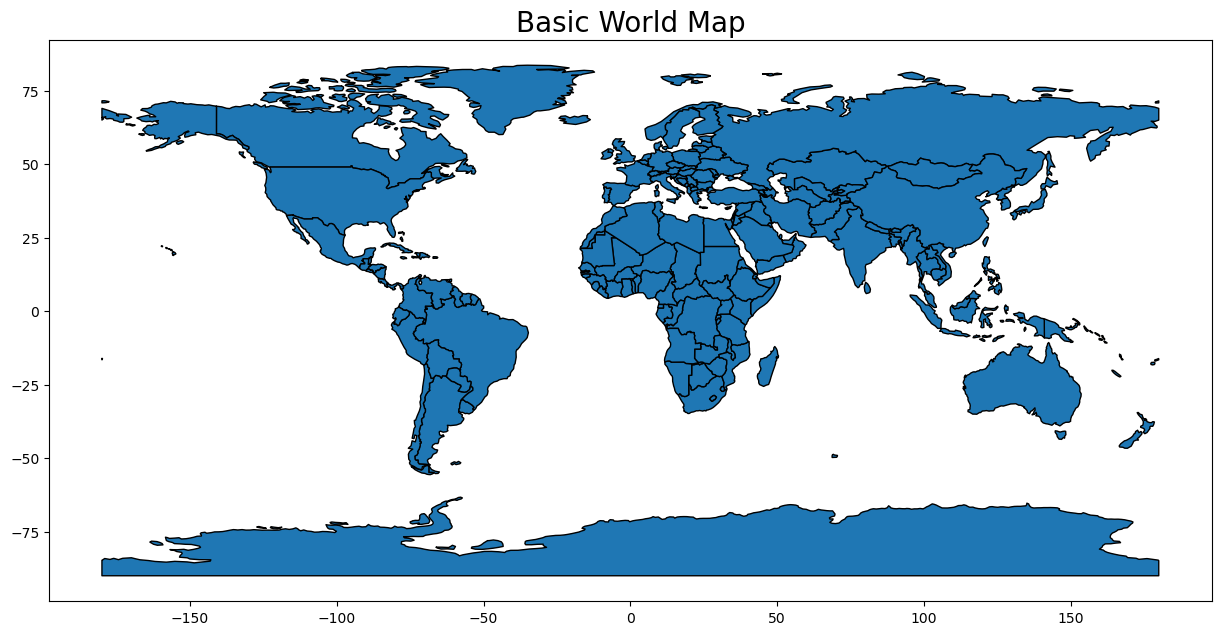

In [28]:
world.plot(figsize=(15, 10), edgecolor='black')
plt.title("Basic World Map", fontsize=20)
plt.show()

## Filter Data

In [30]:
filtered_df_country = df[(df['Type'] == 'Electricity') & (df['Timeline'] == 'historic')]
filtered_df_country.to_csv('elect.csv', index=False)
filtered_data_country_desc = filtered_df_country[filtered_df_country['Description'].str.contains('Emissions intensity of electricity generation', case=False, na=False)]

### Electricity is the only remaining Type

In [33]:
filtered_data_country_desc['Type'].unique()

array(['Electricity'], dtype=object)

In [35]:
# Check columns in the world DataFrame
print(world.columns)

# Check columns in the filtered_df_country DataFrame
print(filtered_data_country_desc.columns)
print(filtered_data_country_desc.head)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
Index(['Type', 'Description', 'ISO_A3', 'Year', 'Timeline', 'Value', 'Unit'], dtype='object')
<bound method NDFrame.head of              Type                                    Description ISO_A3  Year  \
585   Electricity  Emissions intensity of electricity generation    ARG  2000   
586   Electricity  Emissions intensity of electricity generation    ARG  2001   
587   Electricity  Emissions intensity of electricity generation    ARG  2002   
588   Electricity  Emissions intensity of electricity generation    ARG  2003   
589   Electricity  Emissions intensity of electricity generation    ARG  2004   
...           ...                                            ...    ...   ... 

## France == -99

### Our Dataset is correct

In [43]:
csv_data = pd.read_csv('output3.csv')
csv_data["ISO_A3"].unique()

array(['AUS', 'CAN', 'CHL', 'IDN', 'JPN', 'MEX', 'NZL', 'NOR', 'RUS',
       'DEU', 'FRA', 'ITA', 'GBR', 'BRA', 'CHN', 'EU27', 'IND', 'USA',
       'World', 'ZAF', 'ARG', 'CRI', 'ETH', 'KAZ', 'NPL', 'PER', 'PHL',
       'SAU', 'KOR', 'CHE', 'UKR', 'TUR', 'Latin America-31',
       'Non-EU Europe', 'Asia-Pacific-40', 'Middle East', 'Africa', 'ARE',
       'BTN', 'GMB', 'MAR', 'SGP'], dtype=object)

In [45]:
# FRA values are not showing up in map
print(df[df["ISO_A3"].str.contains('FRA', na=False, case=False)])

                Type                                        Description  \
32         Buildings  Buildings emissions intensity (per floor area,...   
33         Buildings  Buildings emissions intensity (per floor area,...   
34         Buildings  Buildings emissions intensity (per floor area,...   
35         Buildings  Buildings emissions intensity (per floor area,...   
36         Buildings  Buildings emissions intensity (per floor area,...   
...              ...                                                ...   
2909  Transport Road                 Road transport emissions intensity   
2910  Transport Road                 Road transport emissions intensity   
2911  Transport Road                 Road transport emissions intensity   
2912  Transport Road                 Road transport emissions intensity   
2913  Transport Road                 Road transport emissions intensity   

     ISO_A3  Year  Timeline      Value          Unit  
32      FRA  1990  historic  63.542662   kg 

In [47]:
filtered_data_country_desc['ISO_A3'].unique()

array(['ARG', 'CAN', 'CRI', 'ETH', 'FRA', 'ITA', 'KAZ', 'NPL', 'NZL',
       'NOR', 'PER', 'PHL', 'RUS', 'SAU', 'KOR', 'CHE', 'UKR', 'World',
       'USA', 'EU27', 'DEU', 'GBR', 'AUS', 'JPN', 'TUR', 'BRA', 'IND',
       'CHN', 'ZAF', 'IDN', 'MEX', 'CHL', 'MAR', 'ARE'], dtype=object)

### Natural World Dataset is not correct

In [52]:
world['ISO_A3'].unique()

array(['FJI', 'TZA', 'ESH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN',
       'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM',
       'RUS', 'BHS', 'FLK', '-99', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO',
       'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC',
       'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'ECU', 'PRI',
       'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT', 'BEN',
       'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB', 'LBR',
       'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI', 'MOZ',
       'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSE', 'GMB', 'TUN',
       'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT', 'KHM',
       'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND', 'BGD',
       'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN', 'SYR',
       'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA', 'ROU',
       'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB', 'HRV',
       'CHE', 'LUX',

In [54]:
world["ISO_A3"] = world["ISO_A3"].replace("-99", "FRA")

## Merge world dataset and emissions dataset

In [57]:
mergedIntensity = world.merge(filtered_data_country_desc, how='left', on='ISO_A3')
mergedIntensity['ISO_A3'] = np.where(mergedIntensity['Value'].isna(), np.nan, mergedIntensity['ISO_A3'])
mergedIntensity['ISO_A3'].unique()

array([nan, 'CAN', 'USA', 'KAZ', 'IDN', 'ARG', 'CHL', 'RUS', 'FRA', 'ZAF',
       'MEX', 'BRA', 'PER', 'CRI', 'ARE', 'KOR', 'IND', 'NPL', 'UKR',
       'DEU', 'TUR', 'CHE', 'NZL', 'AUS', 'CHN', 'ITA', 'GBR', 'PHL',
       'JPN', 'SAU', 'MAR', 'ETH'], dtype=object)

## Plot Intensity Map

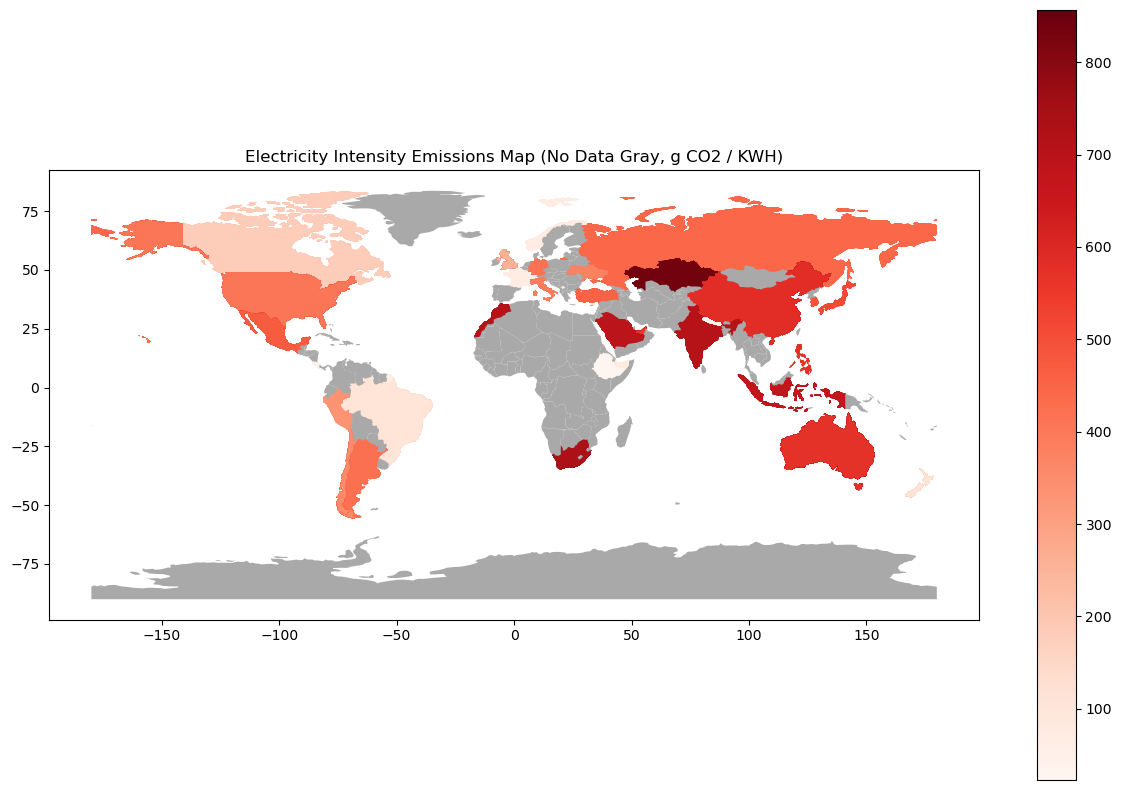

In [60]:
mergedIntensity.plot(
    column='Value',
    cmap='Reds',   # Adjust colormap as needed
    legend=True,
    figsize=(15, 10),
    missing_kwds={
        "color": "darkgray",  # Color for missing data
        "label": "No Data"    # Label for missing data in legend
    }
)

plt.title("Electricity Intensity Emissions Map (No Data Gray, g CO2 / KWH)")
plt.show()

# Share of Coal Percentage in Electricity Generation in World

In [63]:
filtered_data1 = df[
    (df["ISO_A3"] == "World") &
    (df["Description"] == "Share of coal in electricity generation")
]
filtered_data1 = filtered_data1[(filtered_data1['Timeline'] == 'historic')]

In [65]:
filtered_data1 = filtered_data1.sort_values(by="Year")

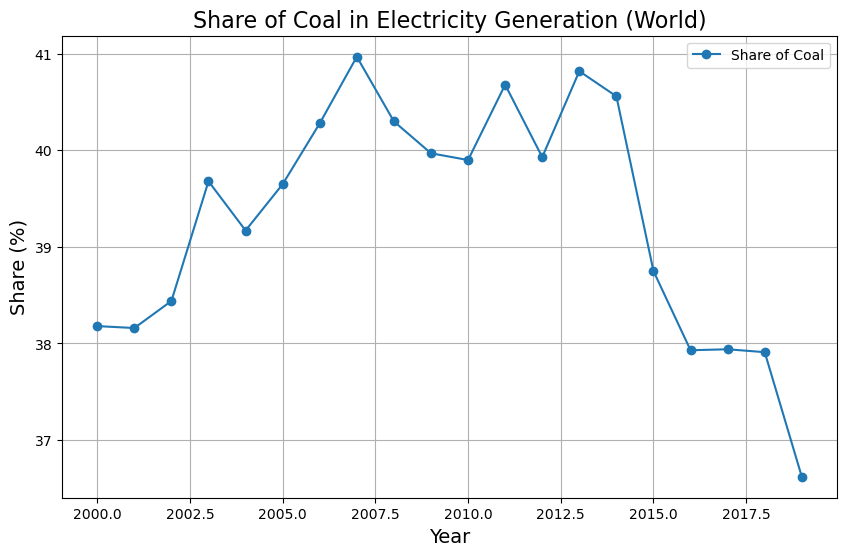

In [67]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data1["Year"], filtered_data1["Value"], marker="o", label="Share of Coal")

# Add labels and title
plt.title("Share of Coal in Electricity Generation (World)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Share (%)", fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()